In [1]:
import os
os.getcwd()

'C:\\Users\\TARA\\Desktop\\remote internship 2020\\project'

In [2]:
os.chdir("C:/Users/TARA/Desktop/remote internship 2020/datasets")
os.getcwd()

'C:\\Users\\TARA\\Desktop\\remote internship 2020\\datasets'

In [3]:
import numpy as np
import pandas as pd
data1=pd.read_csv(r'H1B data.csv',encoding='ISO-8859-1',low_memory=False)
data1

,CASE_SUBMITTED_DAY,CASE_SUBMITTED_MONTH,CASE_SUBMITTED_YEAR,DECISION_DAY,DECISION_MONTH,DECISION_YEAR,VISA_CLASS,EMPLOYER_NAME,EMPLOYER_STATE,EMPLOYER_COUNTRY,...,PW_SOURCE_YEAR,PW_SOURCE_OTHER,WAGE_RATE_OF_PAY_FROM,WAGE_RATE_OF_PAY_TO,WAGE_UNIT_OF_PAY,H-1B_DEPENDENT,WILLFUL_VIOLATOR,WORKSITE_STATE,WORKSITE_POSTAL_CODE,CASE_STATUS
0,24,2,2016,1,10,2016,H1B,DISCOVER PRODUCTS INC,IL,UNITED STATES OF AMERICA,...,2015.0,OFLC ONLINE DATA CENTER,65811.0,67320.0,Year,N,N,IL,60015,CERTIFIEDWITHDRAWN
1,4,3,2016,1,10,2016,H1B,DFS SERVICES LLC,IL,UNITED STATES OF AMERICA,...,2015.0,WILLIS TOWERS WATSON SURVEY,53000.0,57200.0,Year,N,N,IL,60015,CERTIFIEDWITHDRAWN
2,10,3,2016,1,10,2016,H1B,EASTBANC TECHNOLOGIES LLC,DC,UNITED STATES OF AMERICA,...,2015.0,OFLC ONLINE DATA CENTER,77000.0,0.0,Year,Y,N,DC,20007,CERTIFIEDWITHDRAWN
3,28,9,2016,1,10,2016,H1B,INFO SERVICES LLC,MI,UNITED STATES OF AMERICA,...,2016.0,OFLC ONLINE DATA CENTER,102000.0,0.0,Year,Y,N,NJ,7302,WITHDRAWN
4,22,2,2015,2,10,2016,H1B,BBandT CORPORATION,NC,UNITED STATES OF AMERICA,...,2015.0,OFLC ONLINE DATA CENTER,132500.0,0.0,Year,N,N,NY,10036,CERTIFIEDWITHDRAWN
...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...
9995,5,10,2016,12,10,2016,H1B,TATA CONSULTANCY SERVICES LIMITED,MD,UNITED STATES OF AMERICA,...,2016.0,OFLC ONLINE DATA CENTER,74173.0,94500.0,Year,Y,N,IL,60173,CERTIFIED
9996,5,10,2016,12,10,2016,H1B,TATA CONSULTANCY SERVICES LIMITED,MD,UNITED STATES OF AMERICA,...,2016.0,OFLC ONLINE DATA CENTER,65645.0,86000.0,Year,Y,N,NJ,7310,CERTIFIED
9997,5,10,2016,12,10,2016,H1B,TATA CONSULTANCY SERVICES LIMITED,MD,UNITED STATES OF AMERICA,...,2016.0,OFLC ONLINE DATA CENTER,60700.0,87000.0,Year,Y,N,IN,46240,CERTIFIED
9998,5,10,2016,12,10,2016,H1B,TATA CONSULTANCY SERVICES LIMITED,MD,UNITED STATES OF AMERICA,...,2016.0,OFLC ONLINE DATA CENTER,68557.0,94500.0,Year,Y,N,MN,55423,CERTIFIED


# Missing value treatment

In [4]:
#Get a count of missing values in the dataset
data1.apply(lambda x: sum(x.isnull()),axis=0)

CASE_SUBMITTED_DAY         0
CASE_SUBMITTED_MONTH       0
CASE_SUBMITTED_YEAR        0
DECISION_DAY               0
DECISION_MONTH             0
DECISION_YEAR              0
VISA_CLASS                 0
EMPLOYER_NAME              4
EMPLOYER_STATE             0
EMPLOYER_COUNTRY           0
SOC_NAME                   0
NAICS_CODE                 0
TOTAL_WORKERS              0
FULL_TIME_POSITION         0
PREVAILING_WAGE            0
PW_UNIT_OF_PAY             1
PW_SOURCE                  1
PW_SOURCE_YEAR             1
PW_SOURCE_OTHER            0
WAGE_RATE_OF_PAY_FROM      0
WAGE_RATE_OF_PAY_TO        0
WAGE_UNIT_OF_PAY           0
H-1B_DEPENDENT           352
WILLFUL_VIOLATOR         352
WORKSITE_STATE             0
WORKSITE_POSTAL_CODE       0
CASE_STATUS                0
dtype: int64

In [5]:
data1['H-1B_DEPENDENT'].value_counts()

N    5628
Y    4020
Name: H-1B_DEPENDENT, dtype: int64

In [6]:
data1 ['H-1B_DEPENDENT'].fillna('Y', inplace=True)
data1['H-1B_DEPENDENT'].value_counts()

N    5628
Y    4372
Name: H-1B_DEPENDENT, dtype: int64

In [7]:
data1['WILLFUL_VIOLATOR'].value_counts()

N    9637
Y      11
Name: WILLFUL_VIOLATOR, dtype: int64

In [8]:
data1 ['WILLFUL_VIOLATOR'].fillna('N', inplace=True)
data1['WILLFUL_VIOLATOR'].value_counts()

N    9989
Y      11
Name: WILLFUL_VIOLATOR, dtype: int64

In [9]:
data1 ['EMPLOYER_NAME'].fillna('INFOSYS LIMITED ', inplace=True)
data1['EMPLOYER_NAME'].value_counts()

INFOSYS LIMITED                      409
CAPGEMINI AMERICA INC                225
TATA CONSULTANCY SERVICES LIMITED    216
DELOITTE CONSULTING LLP              161
ACCENTURE LLP                        150
                                    ... 
DATA POS INC                           1
NOVELTY INFOTECH INC                   1
MASER CONSULTING PA                    1
SAINT LUKES HEALTH SYSTEM              1
IQUEST SOLUTIONS CORP                  1
Name: EMPLOYER_NAME, Length: 3867, dtype: int64

In [10]:
data1 ['PW_UNIT_OF_PAY'].fillna('Year', inplace=True)
data1['PW_UNIT_OF_PAY'].value_counts()

Year         9476
Hour          509
Week            9
Month           5
Bi-Weekly       1
Name: PW_UNIT_OF_PAY, dtype: int64

In [11]:
data1 ['PW_SOURCE'].fillna('OES', inplace=True)
data1['PW_SOURCE'].value_counts()

OES      8050
Other    1884
CBA        63
DBA         2
SCA         1
Name: PW_SOURCE, dtype: int64

In [12]:
data1 ['PW_SOURCE_YEAR'].fillna(data1['PW_SOURCE_YEAR'].mean(), inplace=True)
data1['PW_SOURCE_YEAR'].value_counts()

2016.000000    8749
2015.000000     786
2014.000000     319
2013.000000     137
2012.000000       4
2011.000000       2
2015.810881       1
2009.000000       1
1993.000000       1
Name: PW_SOURCE_YEAR, dtype: int64

In [13]:
# After imputation Get a count of missing values in the dataset
data1.apply(lambda x: sum(x.isnull()),axis=0)

CASE_SUBMITTED_DAY       0
CASE_SUBMITTED_MONTH     0
CASE_SUBMITTED_YEAR      0
DECISION_DAY             0
DECISION_MONTH           0
DECISION_YEAR            0
VISA_CLASS               0
EMPLOYER_NAME            0
EMPLOYER_STATE           0
EMPLOYER_COUNTRY         0
SOC_NAME                 0
NAICS_CODE               0
TOTAL_WORKERS            0
FULL_TIME_POSITION       0
PREVAILING_WAGE          0
PW_UNIT_OF_PAY           0
PW_SOURCE                0
PW_SOURCE_YEAR           0
PW_SOURCE_OTHER          0
WAGE_RATE_OF_PAY_FROM    0
WAGE_RATE_OF_PAY_TO      0
WAGE_UNIT_OF_PAY         0
H-1B_DEPENDENT           0
WILLFUL_VIOLATOR         0
WORKSITE_STATE           0
WORKSITE_POSTAL_CODE     0
CASE_STATUS              0
dtype: int64

In [14]:
data1.isnull().any()

CASE_SUBMITTED_DAY       False
CASE_SUBMITTED_MONTH     False
CASE_SUBMITTED_YEAR      False
DECISION_DAY             False
DECISION_MONTH           False
DECISION_YEAR            False
VISA_CLASS               False
EMPLOYER_NAME            False
EMPLOYER_STATE           False
EMPLOYER_COUNTRY         False
SOC_NAME                 False
NAICS_CODE               False
TOTAL_WORKERS            False
FULL_TIME_POSITION       False
PREVAILING_WAGE          False
PW_UNIT_OF_PAY           False
PW_SOURCE                False
PW_SOURCE_YEAR           False
PW_SOURCE_OTHER          False
WAGE_RATE_OF_PAY_FROM    False
WAGE_RATE_OF_PAY_TO      False
WAGE_UNIT_OF_PAY         False
H-1B_DEPENDENT           False
WILLFUL_VIOLATOR         False
WORKSITE_STATE           False
WORKSITE_POSTAL_CODE     False
CASE_STATUS              False
dtype: bool

In [15]:
data1['CASE_STATUS'].replace(['CERTIFIED','CERTIFIEDWITHDRAWN','WITHDRAWN','DENIED'],[1,0,2,3],inplace=True)

In [16]:
data1

,CASE_SUBMITTED_DAY,CASE_SUBMITTED_MONTH,CASE_SUBMITTED_YEAR,DECISION_DAY,DECISION_MONTH,DECISION_YEAR,VISA_CLASS,EMPLOYER_NAME,EMPLOYER_STATE,EMPLOYER_COUNTRY,...,PW_SOURCE_YEAR,PW_SOURCE_OTHER,WAGE_RATE_OF_PAY_FROM,WAGE_RATE_OF_PAY_TO,WAGE_UNIT_OF_PAY,H-1B_DEPENDENT,WILLFUL_VIOLATOR,WORKSITE_STATE,WORKSITE_POSTAL_CODE,CASE_STATUS
0,24,2,2016,1,10,2016,H1B,DISCOVER PRODUCTS INC,IL,UNITED STATES OF AMERICA,...,2015.0,OFLC ONLINE DATA CENTER,65811.0,67320.0,Year,N,N,IL,60015,0
1,4,3,2016,1,10,2016,H1B,DFS SERVICES LLC,IL,UNITED STATES OF AMERICA,...,2015.0,WILLIS TOWERS WATSON SURVEY,53000.0,57200.0,Year,N,N,IL,60015,0
2,10,3,2016,1,10,2016,H1B,EASTBANC TECHNOLOGIES LLC,DC,UNITED STATES OF AMERICA,...,2015.0,OFLC ONLINE DATA CENTER,77000.0,0.0,Year,Y,N,DC,20007,0
3,28,9,2016,1,10,2016,H1B,INFO SERVICES LLC,MI,UNITED STATES OF AMERICA,...,2016.0,OFLC ONLINE DATA CENTER,102000.0,0.0,Year,Y,N,NJ,7302,2
4,22,2,2015,2,10,2016,H1B,BBandT CORPORATION,NC,UNITED STATES OF AMERICA,...,2015.0,OFLC ONLINE DATA CENTER,132500.0,0.0,Year,N,N,NY,10036,0
...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...
9995,5,10,2016,12,10,2016,H1B,TATA CONSULTANCY SERVICES LIMITED,MD,UNITED STATES OF AMERICA,...,2016.0,OFLC ONLINE DATA CENTER,74173.0,94500.0,Year,Y,N,IL,60173,1
9996,5,10,2016,12,10,2016,H1B,TATA CONSULTANCY SERVICES LIMITED,MD,UNITED STATES OF AMERICA,...,2016.0,OFLC ONLINE DATA CENTER,65645.0,86000.0,Year,Y,N,NJ,7310,1
9997,5,10,2016,12,10,2016,H1B,TATA CONSULTANCY SERVICES LIMITED,MD,UNITED STATES OF AMERICA,...,2016.0,OFLC ONLINE DATA CENTER,60700.0,87000.0,Year,Y,N,IN,46240,1
9998,5,10,2016,12,10,2016,H1B,TATA CONSULTANCY SERVICES LIMITED,MD,UNITED STATES OF AMERICA,...,2016.0,OFLC ONLINE DATA CENTER,68557.0,94500.0,Year,Y,N,MN,55423,1


In [17]:
x=data1.iloc[:,6:27]

In [44]:
x

,VISA_CLASS,EMPLOYER_NAME,EMPLOYER_STATE,EMPLOYER_COUNTRY,SOC_NAME,NAICS_CODE,TOTAL_WORKERS,FULL_TIME_POSITION,PREVAILING_WAGE,PW_UNIT_OF_PAY,...,PW_SOURCE_YEAR,PW_SOURCE_OTHER,WAGE_RATE_OF_PAY_FROM,WAGE_RATE_OF_PAY_TO,WAGE_UNIT_OF_PAY,H-1B_DEPENDENT,WILLFUL_VIOLATOR,WORKSITE_STATE,WORKSITE_POSTAL_CODE,CASE_STATUS
0,H1B,DISCOVER PRODUCTS INC,IL,UNITED STATES OF AMERICA,ANALYSTS,522210,1,Y,59197.0,Year,...,2015.0,OFLC ONLINE DATA CENTER,65811.0,67320.0,Year,N,N,IL,60015,0
1,H1B,DFS SERVICES LLC,IL,UNITED STATES OF AMERICA,ANALYSTS,522210,1,Y,49800.0,Year,...,2015.0,WILLIS TOWERS WATSON SURVEY,53000.0,57200.0,Year,N,N,IL,60015,0
2,H1B,EASTBANC TECHNOLOGIES LLC,DC,UNITED STATES OF AMERICA,ANALYSTS,541511,2,Y,76502.0,Year,...,2015.0,OFLC ONLINE DATA CENTER,77000.0,0.0,Year,Y,N,DC,20007,0
3,H1B,INFO SERVICES LLC,MI,UNITED STATES OF AMERICA,COMPUTER OCCUPATION,541511,1,Y,90376.0,Year,...,2016.0,OFLC ONLINE DATA CENTER,102000.0,0.0,Year,Y,N,NJ,7302,2
4,H1B,BBandT CORPORATION,NC,UNITED STATES OF AMERICA,ANALYSTS,522110,1,Y,116605.0,Year,...,2015.0,OFLC ONLINE DATA CENTER,132500.0,0.0,Year,N,N,NY,10036,0
...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...
9995,H1B,TATA CONSULTANCY SERVICES LIMITED,MD,UNITED STATES OF AMERICA,ENGINEERS,541511,1,Y,74173.0,Year,...,2016.0,OFLC ONLINE DATA CENTER,74173.0,94500.0,Year,Y,N,IL,60173,1
9996,H1B,TATA CONSULTANCY SERVICES LIMITED,MD,UNITED STATES OF AMERICA,ENGINEERS,541511,1,Y,65645.0,Year,...,2016.0,OFLC ONLINE DATA CENTER,65645.0,86000.0,Year,Y,N,NJ,7310,1
9997,H1B,TATA CONSULTANCY SERVICES LIMITED,MD,UNITED STATES OF AMERICA,ENGINEERS,541511,1,Y,59322.0,Year,...,2016.0,OFLC ONLINE DATA CENTER,60700.0,87000.0,Year,Y,N,IN,46240,1
9998,H1B,TATA CONSULTANCY SERVICES LIMITED,MD,UNITED STATES OF AMERICA,ENGINEERS,541511,1,Y,68557.0,Year,...,2016.0,OFLC ONLINE DATA CENTER,68557.0,94500.0,Year,Y,N,MN,55423,1


In [18]:
x=data1.iloc[:,6:27].values
y=data1.iloc[:, 26].values

In [19]:
x

array([['H1B', 'DISCOVER PRODUCTS INC', 'IL', ..., 'IL', 60015, 0],
       ['H1B', 'DFS SERVICES LLC', 'IL', ..., 'IL', 60015, 0],
       ['H1B', 'EASTBANC TECHNOLOGIES LLC', 'DC', ..., 'DC', 20007, 0],
       ...,
       ['H1B', 'TATA CONSULTANCY SERVICES LIMITED', 'MD', ..., 'IN',
        46240, 1],
       ['H1B', 'TATA CONSULTANCY SERVICES LIMITED', 'MD', ..., 'MN',
        55423, 1],
       ['H1B', 'TATA CONSULTANCY SERVICES LIMITED', 'MD', ..., 'TX',
        75039, 1]], dtype=object)

In [20]:
y

array([0, 0, 0, ..., 1, 1, 1], dtype=int64)

# Label Encoding

In [21]:
from sklearn.preprocessing import LabelEncoder
lb=LabelEncoder()

In [22]:
x[:,0]=lb.fit_transform(x[:,0]) #visa class
x[:,1]=lb.fit_transform(x[:,1]) #employer name
x[:,2]=lb.fit_transform(x[:,2]) #employer state
x[:,3]=lb.fit_transform(x[:,3]) #employer country
x[:,4]=lb.fit_transform(x[:,4]) #soc_name

x[:,-3]=lb.fit_transform(x[:,-3]) #worksite state
x[:,-4]=lb.fit_transform(x[:,-4])#willfull violator
x[:,-5]=lb.fit_transform(x[:,-5])#h1b dependent
x[:,7]=lb.fit_transform(x[:,7]) #full time position
x[:,9]=lb.fit_transform(x[:,9]) #pw unit of pay
x[:,10]=lb.fit_transform(x[:,10]) #pw source
x[:,12]=lb.fit_transform(x[:,12]) #pw source other
x[:,15]=lb.fit_transform(x[:,15]) #wage unit of pay

In [23]:
x

array([[1, 948, 15, ..., 15, 60015, 0],
       [1, 924, 15, ..., 15, 60015, 0],
       [1, 1002, 7, ..., 7, 20007, 0],
       ...,
       [1, 3242, 21, ..., 16, 46240, 1],
       [1, 3242, 21, ..., 24, 55423, 1],
       [1, 3242, 21, ..., 46, 75039, 1]], dtype=object)

In [51]:
data1['CASE_STATUS'].unique()

array([0, 2, 1, 3], dtype=int64)

# One-Hot Encoding

In [24]:
from sklearn.preprocessing import OneHotEncoder
oh=OneHotEncoder(categorical_features=[0])
x=oh.fit_transform(x).toarray()  

C:\ProgramData\Anaconda3\lib\site-packages\sklearn\preprocessing\_encoders.py:415: FutureWarning: The handling of integer data will change in version 0.22. Currently, the categories are determined based on the range [0, max(values)], while in the future they will be determined based on the unique values.
If you want the future behaviour and silence this warning, you can specify "categories='auto'".
In case you used a LabelEncoder before this OneHotEncoder to convert the categories to integers, then you can now use the OneHotEncoder directly.
  warnings.warn(msg, FutureWarning)
C:\ProgramData\Anaconda3\lib\site-packages\sklearn\preprocessing\_encoders.py:451: DeprecationWarning: The 'categorical_features' keyword is deprecated in version 0.20 and will be removed in 0.22. You can use the ColumnTransformer instead.
  "use the ColumnTransformer instead.", DeprecationWarning)


In [25]:
x

array([[0.0000e+00, 1.0000e+00, 0.0000e+00, ..., 1.5000e+01, 6.0015e+04,
        0.0000e+00],
       [0.0000e+00, 1.0000e+00, 0.0000e+00, ..., 1.5000e+01, 6.0015e+04,
        0.0000e+00],
       [0.0000e+00, 1.0000e+00, 0.0000e+00, ..., 7.0000e+00, 2.0007e+04,
        0.0000e+00],
       ...,
       [0.0000e+00, 1.0000e+00, 0.0000e+00, ..., 1.6000e+01, 4.6240e+04,
        1.0000e+00],
       [0.0000e+00, 1.0000e+00, 0.0000e+00, ..., 2.4000e+01, 5.5423e+04,
        1.0000e+00],
       [0.0000e+00, 1.0000e+00, 0.0000e+00, ..., 4.6000e+01, 7.5039e+04,
        1.0000e+00]])

In [26]:
x=x[:,1:]

In [27]:
x[1,:]

array([1.0000e+00, 0.0000e+00, 0.0000e+00, 9.2400e+02, 1.5000e+01,
       0.0000e+00, 3.0000e+00, 5.2221e+05, 1.0000e+00, 1.0000e+00,
       4.9800e+04, 4.0000e+00, 3.0000e+00, 2.0150e+03, 3.1000e+01,
       5.3000e+04, 5.7200e+04, 4.0000e+00, 0.0000e+00, 0.0000e+00,
       1.5000e+01, 6.0015e+04, 0.0000e+00])

# Splitting the data

In [28]:
from sklearn.model_selection import train_test_split
x_train,x_test,y_train,y_test=train_test_split(x,y,test_size=0.2)

In [29]:
x_test

array([[1.0000e+00, 0.0000e+00, 0.0000e+00, ..., 1.5000e+01, 6.1704e+04,
        1.0000e+00],
       [1.0000e+00, 0.0000e+00, 0.0000e+00, ..., 4.0000e+00, 9.5134e+04,
        1.0000e+00],
       [1.0000e+00, 0.0000e+00, 0.0000e+00, ..., 1.6000e+01, 4.6216e+04,
        1.0000e+00],
       ...,
       [0.0000e+00, 0.0000e+00, 0.0000e+00, ..., 3.6000e+01, 1.0016e+04,
        3.0000e+00],
       [1.0000e+00, 0.0000e+00, 0.0000e+00, ..., 3.3000e+01, 8.5400e+03,
        1.0000e+00],
       [1.0000e+00, 0.0000e+00, 0.0000e+00, ..., 3.3000e+01, 7.0800e+03,
        1.0000e+00]])

In [30]:
y_test = y_test.astype('int')
y_test

array([1, 1, 1, ..., 3, 1, 1])

# Feature Scaling

In [82]:
from sklearn.preprocessing import StandardScaler
scaler= StandardScaler()

x_train =scaler.fit_transform(x_train)
x_test = scaler.transform(x_test)

# KNN

In [32]:
#Fitting Classifier to the Training set
from sklearn import model_selection, neighbors
clf = neighbors.KNeighborsClassifier()
clf.fit(x_train,y_train)

KNeighborsClassifier(algorithm='auto', leaf_size=30, metric='minkowski',
                     metric_params=None, n_jobs=None, n_neighbors=5, p=2,
                     weights='uniform')

In [33]:
#Predict on test data
y_pred=clf.predict(x_test)

In [34]:
print("Actual case_status : ")
print(y_test)

Actual case_status : 
[1 1 1 ... 3 1 1]


In [35]:
print("\nPredicted case_status : ")
print(y_pred)


Predicted case_status : 
[1 1 1 ... 2 1 1]


In [36]:
#Build confusion matrix on Test and Train
from sklearn.metrics import confusion_matrix
clf_cm_test = confusion_matrix(y_test,y_pred)
clf_cm_test

array([[ 238,   19,    0,    0],
       [   0, 1642,    0,    0],
       [   0,   12,   59,    0],
       [   0,    3,    2,   25]], dtype=int64)

In [37]:
#Obtain accuracy
accuracy = clf.score(x_test,y_test)

In [38]:
print(accuracy)

0.982


In [39]:
#Predict the probability of each test data point
#Get the probability distribution
probas = clf.predict_proba(x_test)

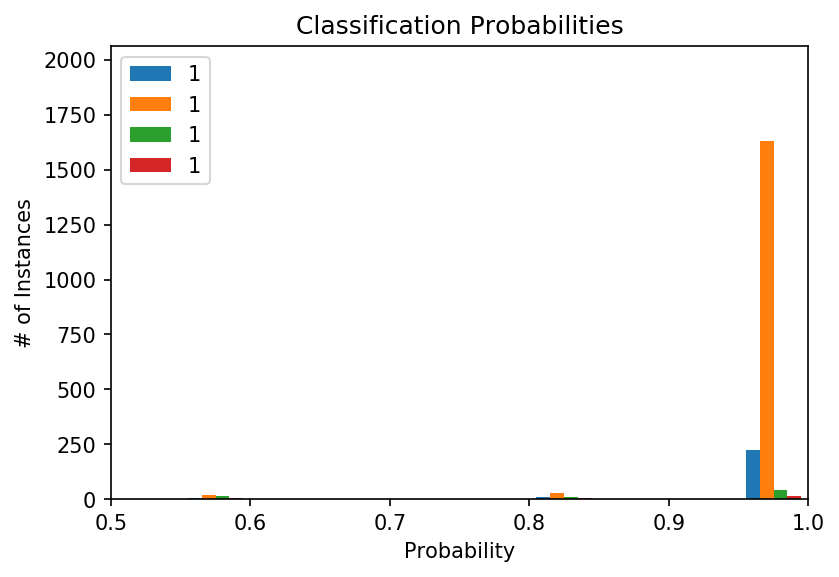

In [41]:
#Visualize the probabilities
# plot
import matplotlib.pyplot as plt
plt.figure(dpi=150)
plt.hist(probas, bins=20)
plt.title('Classification Probabilities')
plt.xlabel('Probability')
plt.ylabel('# of Instances')
plt.xlim([0.5, 1.0])
plt.legend(y_test)
plt.show()

In [42]:
#Accuracy score on Test and Train
from sklearn.metrics import accuracy_score, recall_score, confusion_matrix

print("\nAccuracy score: %f" %(accuracy_score(y_test,y_pred) * 100))
print("Recall score : %f" %(recall_score(y_test, y_pred,average='micro') * 100))
print(confusion_matrix(y_test, y_pred)) 


Accuracy score: 98.200000
Recall score : 98.200000
[[ 238   19    0    0]
 [   0 1642    0    0]
 [   0   12   59    0]
 [   0    3    2   25]]


# Support Vector Classification

In [43]:
#Support Vector Classification
from sklearn.svm import SVC
sc = SVC(kernel='rbf')
sc_classifier = sc.fit(x_train,y_train)  #model building 

C:\ProgramData\Anaconda3\lib\site-packages\sklearn\svm\base.py:193: FutureWarning: The default value of gamma will change from 'auto' to 'scale' in version 0.22 to account better for unscaled features. Set gamma explicitly to 'auto' or 'scale' to avoid this warning.
  "avoid this warning.", FutureWarning)


In [44]:
#Predicting on Test and Train data
svc_y_test = sc_classifier.predict(x_test)
print(svc_y_test)

[1 1 1 ... 3 1 1]


In [45]:
#Build confusion matrix on test and train
from sklearn.metrics import confusion_matrix
svc_cm_test = confusion_matrix(y_test,svc_y_test)   
svc_cm_test

array([[ 256,    1,    0,    0],
       [   0, 1642,    0,    0],
       [   0,    5,   66,    0],
       [   0,    2,    0,   28]], dtype=int64)

In [46]:
#Accuracy classsification score
from sklearn.metrics import accuracy_score
svc_acc_test=accuracy_score(y_test, svc_y_test)  #for test  
svc_acc_test

0.996

In [48]:
#Precision score on Test and Train
from sklearn.metrics import precision_score
sv_precision_test= precision_score(y_test, svc_y_test, average='weighted')  
print(sv_precision_test)


0.9960193939393939


# Naibe Bayes Classification

In [49]:
#Perform Naibe Bayes Classification
from sklearn.naive_bayes import GaussianNB
nb_classfier =GaussianNB()
nb_classfier.fit(x_train, y_train)

GaussianNB(priors=None, var_smoothing=1e-09)

In [50]:
#Predicting on Test and Train
nb_y_test = nb_classfier.predict(x_test)  #for test
nb_y_test

array([1, 1, 1, ..., 3, 1, 1], dtype=int64)

In [51]:
#Build confusion matrix on Test and Train
from sklearn.metrics import confusion_matrix
nb_cm_test = confusion_matrix(y_test,nb_y_test)
nb_cm_test

array([[ 257,    0,    0,    0],
       [   0, 1642,    0,    0],
       [   0,    0,   71,    0],
       [   0,    1,    0,   29]], dtype=int64)

In [52]:
#Accuracy score on Test and Train
from sklearn.metrics import accuracy_score
nb_acc_test=accuracy_score(y_test, nb_y_test)
nb_acc_test

0.9995

In [54]:
#Precision score on Test and Train
from sklearn.metrics import precision_score

nb_precision_test =precision_score(y_test, nb_y_test, average='weighted')  
print(nb_precision_test)


0.9995003043213633


# Logistic Regression

In [55]:
#Perform Logistic Regression
from sklearn.linear_model.logistic import LogisticRegression

cls =LogisticRegression(random_state =0)

lr_cls=cls.fit(x_train, y_train)

C:\ProgramData\Anaconda3\lib\site-packages\sklearn\linear_model\logistic.py:432: FutureWarning: Default solver will be changed to 'lbfgs' in 0.22. Specify a solver to silence this warning.
  FutureWarning)
C:\ProgramData\Anaconda3\lib\site-packages\sklearn\linear_model\logistic.py:469: FutureWarning: Default multi_class will be changed to 'auto' in 0.22. Specify the multi_class option to silence this warning.
  "this warning.", FutureWarning)


In [56]:
#Predicting on test and train data
lr_y_test =lr_cls.predict(x_test)
lr_y_test

array([1, 1, 1, ..., 3, 1, 1], dtype=int64)

In [57]:
print("Actual case_status : ")
print(y_test)

Actual case_status : 
[1 1 1 ... 3 1 1]


In [58]:
print("\nPredicted case_status : ")
print(lr_y_test)


Predicted case_status : 
[1 1 1 ... 3 1 1]


In [59]:
#Accuracy score on Test and Train
from sklearn.metrics import accuracy_score, recall_score, confusion_matrix

print("\nAccuracy score: %f" %(accuracy_score(y_test,lr_y_test) * 100))
print("Recall score : %f" %(recall_score(y_test, lr_y_test,average='micro') * 100))
print(confusion_matrix(y_test, lr_y_test)) 


Accuracy score: 96.300000
Recall score : 96.300000
[[ 256    1    0    0]
 [   0 1635    7    0]
 [   0   55   16    0]
 [   0    3    8   19]]


In [61]:
#Precision score on Test and Train
from sklearn.metrics import precision_score

lr_precision_test =precision_score(y_test, lr_y_test, average='weighted')  
print(lr_precision_test)


0.9542281296416194


# Decision Tree Classifier

In [62]:
#Decision Tree Classifier
from sklearn.tree import DecisionTreeClassifier

dtc_clf = DecisionTreeClassifier()
dtc_clf.fit(x_train,y_train)


DecisionTreeClassifier(class_weight=None, criterion='gini', max_depth=None,
                       max_features=None, max_leaf_nodes=None,
                       min_impurity_decrease=0.0, min_impurity_split=None,
                       min_samples_leaf=1, min_samples_split=2,
                       min_weight_fraction_leaf=0.0, presort=False,
                       random_state=None, splitter='best')

In [64]:
import pickle
dtc_clf=pickle.load(open('dtcmodel.pkl','rb'))

In [65]:
#Predicting on test and train data
dtc_y_test =dtc_clf.predict(x_test)
dtc_y_test

array([1, 1, 1, ..., 2, 1, 1])

In [66]:
#Build confusion matrix on Test and Train
from sklearn.metrics import confusion_matrix
dtc_cm_test = confusion_matrix(y_test, dtc_y_test)
dtc_cm_test

array([[ 257,    0,    0,    0],
       [   0, 1642,    0,    0],
       [   0,    0,   71,    0],
       [   0,    0,   30,    0]], dtype=int64)

In [67]:
#Accuracy score on Test and Train
from sklearn.metrics import accuracy_score
dtc_accu_test= accuracy_score(y_test,dtc_y_test)
dtc_accu_test

0.985

In [69]:
#Precision score on Test and Train
from sklearn.metrics import precision_score

dtc_precision_test =precision_score(y_test, dtc_y_test, average='weighted')  
print(dtc_precision_test)


0.9744554455445544


In [71]:
#Recall score on Test and Train
from sklearn.metrics import recall_score
dtc_recall_test=recall_score(y_test,dtc_y_test, average='weighted' )
print(dtc_recall_test)


0.985


# Adaboost

In [103]:
#Perform AdaBoost
from sklearn import model_selection
from sklearn.ensemble import AdaBoostClassifier
seed = 7
num_trees = 30
kfold = model_selection.KFold(n_splits=10, random_state=seed)
model = AdaBoostClassifier(n_estimators=num_trees, random_state=seed)
results = model_selection.cross_val_score(model, x_train, y_train, cv=kfold)

In [104]:
print(results)

[0.975   0.95875 0.97375 0.95875 0.9575  0.97125 0.9725  0.97125 0.9675
 0.9825 ]


In [105]:
print(results.mean())

0.9688749999999999


# Random forest

In [72]:
#Build Random Forest Calssifier
from sklearn.ensemble import RandomForestClassifier
rmf = RandomForestClassifier(max_depth=3, random_state=0)
rf_classi = rmf.fit(x_train, y_train)

C:\ProgramData\Anaconda3\lib\site-packages\sklearn\ensemble\forest.py:245: FutureWarning: The default value of n_estimators will change from 10 in version 0.20 to 100 in 0.22.
  "10 in version 0.20 to 100 in 0.22.", FutureWarning)


In [73]:
#Predicting on test and train data
rf_y_test = rf_classi.predict(x_test)
rf_y_test

array([1, 1, 1, ..., 1, 1, 1], dtype=int64)

In [74]:
#Build Confusion Matrix on Test and Train
from sklearn.metrics import confusion_matrix
rf_cm_test = confusion_matrix(y_test, rf_y_test)
rf_cm_test

array([[ 207,   50,    0,    0],
       [   0, 1642,    0,    0],
       [   4,   67,    0,    0],
       [   0,   30,    0,    0]], dtype=int64)

In [75]:
#Accuracy Score on Test and Train
from sklearn.metrics import accuracy_score
rf_accu_test= accuracy_score(y_test,rf_y_test)  #test
rf_accu_test

0.9245

In [77]:
#Precision Score on Test and Train
from sklearn.metrics import precision_score
rf_precision_test =precision_score(y_test, rf_y_test, average='weighted')  
print(rf_precision_test)  #test data


0.8796033885328721


In [79]:
from sklearn.metrics import recall_score
rf_recall_test=recall_score(y_test,rf_y_test, average='weighted' )
print(rf_recall_test)


0.9245


# Observation 

In [90]:
dtc_y_new1 = dtc_clf.predict(scaler.fit_transform(np.array([[0, 1, 0,0,1,541700,1,52915,2015,2,53000,57200,3,60015,2,876,6354,765,764554,63445,755,6443,7535]])))

In [91]:
dtc_y_new1

array([1])